## 人工智能编程基础（试学班）

## 项目：我的微信好友

在这个notebook文件中，有些模板代码已经提供给你，但你还需要实现更多的功能来完成这个项目。除非有明确要求，你无须修改任何已给出的代码。以**'(练习)'**开始的标题表示接下来的代码部分中有你需要实现的功能。这些部分都配有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示。

除了实现代码外，你还**需要**回答一些与项目及代码相关的问题。每个需要回答的问题都会以 **'问题 X'** 标记。请仔细阅读每个问题，并且在问题后的 **'回答'** 部分写出完整的答案。我们将根据 你对问题的回答 和 撰写代码实现的功能 来对你提交的项目进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

---

### 让我们开始吧

在这个项目中，你将通过开源的微信个人号接口 [itchat](http://itchat.readthedocs.io/zh/latest/) 来实现 Python 调用微信好友数据，并做一些有趣的统计和分析，最终分享给你的好友 :P

### 项目内容

我们将这个notebook分为不同的步骤，你将完成以下5个任务：

1. 登陆微信，并通过向文件传输助手发送打招呼信息
2. 统计你的微信好友的男女比例
3. 分析微信好友的地域分布
4. 生成微信好友的签名词云图
5. 对签名进行情感分析

## 1. 登陆并发送打招呼信息

### 登陆
在这一个章节中，我们已经为你导入`itchat`这个包，并调用`login()`函数登陆网页微信，试试看运行以下代码，并扫描二维码以登陆网页微信。

In [2]:
# 导入 itchat 这个包，以便于在之后可以调用其中所提供的函数
import itchat

# 调用login()函数以登录网页微信
itchat.login()

itchat has already logged in.


### 打个招呼吧

在这个章节中，你将调用`itchat`的`send()`函数向文件传输助手`filehelper`发送一个打招呼信息吧！

需要完成：
替换函数中的第一个参数中的文字，向你的文件传输助手发送一段话 :P

In [60]:
### TODO：将消息内容赋值给message并运行代码块给你的文件传输助手发送消息
message = None

# 发送消息
itchat.send(message, 'filehelper')

<ItchatReturnValue: {'BaseResponse': {'ErrMsg': '参数错误', 'Ret': -1005, 'RawMsg': 'No message.'}}>

## 2. 好友男女比例

In [5]:
# 获取好友列表
dataset = itchat.get_friends(update=True)[0:]

根据我们希望探索的问题，需要从数据集中取出以下几个部分：
- NickName：微信昵称
- Sex：性别，1表示男性，2表示女性
- Province：省份
- City：城市
- Signature：微信签名

In [10]:
# 数据预处理 取出需要的特征
def preprocess_data(dataset):

    data = [{'NickName': item['NickName'], 
            'Sex': item['Sex'], 
            'Province': item['Province'], 
            'City': item['City'], 
            'Signature': item['Signature']} for item in dataset]
    
    return data

In [22]:
### TODO：调用preprocess_data()函数，将dataset作为参数，并赋值给pre_data
pre_data = None

In [27]:
### TODO：打印第1条数据


{'NickName': 'Liu Shu Wen🌿', 'Sex': 2, 'Province': '', 'City': '', 'Signature': 'Enjoy<span class="emoji emoji1f49d"></span>'}


In [29]:
### TODO：打印第一条数据的微信名称


Liu Shu Wen🌿


我的好友中共有 1 位男性、 1 位女性， 有 3 位好友未填写。


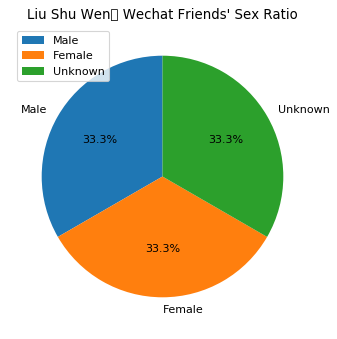

In [48]:
# 导入数据可视化所需要的包
import matplotlib.pyplot as plt
%matplotlib inline

# TODO：统计好友性别（除了自己），并分别赋到sex这个字典中，注意这里1表示男性、2表示女性
sex = {
    'male': 0,
    'female': 0,
    'unknown': 0
}


print("我的好友中共有", male,"位男性、", female, "位女性，", "有", unknown, "位好友未填写。")

plt.figure(figsize=(8,5), dpi=80)
plt.axes(aspect=1) 
plt.pie([sex['male'], sex['female'], sex['unknown']],
        labels=['Male','Female','Unknown'],
        labeldistance = 1.1,
        autopct = '%3.1f%%',
        shadow = False,
        startangle = 90,
        pctdistance = 0.6 
)

plt.legend(loc='upper left',)
plt.title(u"%s Wechat Friends' Sex Ratio" % pre_data[0]['NickName'])
plt.show()

## 3. 好友地域分布

In [62]:
### TODO：将好友所在省份（不为空）通过 for 循环添加到 province 中
province = []
        
# TODO：打印出前5个省份


['Naples', '北京', '江苏', '江苏', '上海']


In [41]:
import pinyin
province = [pinyin.get(i, format="strip", delimiter="") for i in province if i != '']

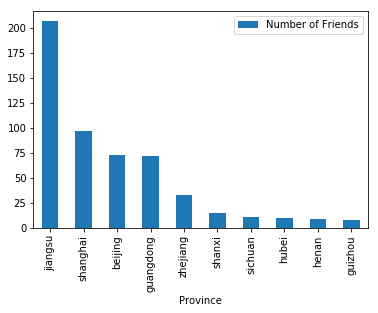

In [43]:
import pandas as pd
province = pd.DataFrame(province)
province.columns = ['Province']
province['Number of Friends'] = 1
province.groupby('Province').sum().sort_values('Number of Friends', ascending=False)[:10].plot.bar()

## 4. 生成好友个性签名词云图

In [44]:
### TODO：打印出第一条数据的个性签名


Enjoy<span class="emoji emoji1f49d"></span>


In [45]:
import re
import os 
import numpy as np

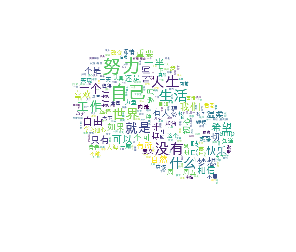

In [52]:
tList = []
for i in pre_data:
    signature = i["Signature"].replace(" ", "").replace("span", "").replace("class", "").replace("emoji", "")
    rep = re.compile("1f\d.+")
    signature = rep.sub("", signature)
    if len(signature) > 0:
        tList.append(signature)
    
text = "".join(tList)

# jieba分词
import jieba
wordlist_jieba = jieba.cut(text, cut_all=True)
wl_space_split = " ".join(wordlist_jieba)

# wordcloud词云
from wordcloud import WordCloud
import PIL.Image as Image

alice_coloring = np.array(Image.open("wechat.jpg")))

my_wordcloud = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
                         max_font_size=40, random_state=42,).generate(wl_space_split)

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

my_wordcloud.to_file(os.path.join(d, "wechatfriends_wordcloud.png"))

## 5. 对好友签名进行情感分析

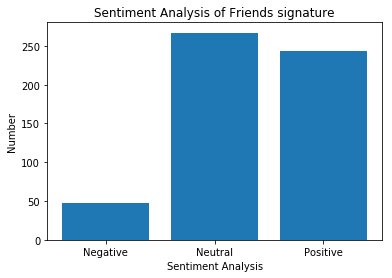

LOG OUT!


In [64]:
from snownlp import SnowNLP

setiments = []
for i in tList:
    setiments.append(SnowNLP(i).sentiments) 

### TODO：统计sentiments中大于0.66的个数


### TODO：统计sentiments中大于等于0.33且小于等于0.66的个数


### TODO：统计sentiments中小于0.33的个数



labels = [u'Negative',u'Neutral',u'Positive']
values = (negative,neutral,positive)
plt.xlabel(u'Sentiment Analysis')
plt.ylabel(u'Number')
plt.xticks(range(3),labels)
plt.bar(range(3), values)

plt.title('Sentiment Analysis of Friends signature')
plt.show()

In [58]:
itchat.logout()

<ItchatReturnValue: {'BaseResponse': {'ErrMsg': '请求成功', 'Ret': 0, 'RawMsg': 'logout successfully.'}}>

**注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出File -> Download as -> HTML (.html)把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。**